In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv('cems_forKMEANS.csv')

In [3]:
df.head()

,Gen Unit,2015-01-01 00:00:00,2015-01-01 01:00:00,2015-01-01 02:00:00,2015-01-01 03:00:00,2015-01-01 04:00:00,2015-01-01 05:00:00,2015-01-01 06:00:00,2015-01-01 07:00:00,2015-01-01 08:00:00,...,2015-12-31 14:00:00,2015-12-31 15:00:00,2015-12-31 16:00:00,2015-12-31 17:00:00,2015-12-31 18:00:00,2015-12-31 19:00:00,2015-12-31 20:00:00,2015-12-31 21:00:00,2015-12-31 22:00:00,2015-12-31 23:00:00
0,AES Alamitos1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AES Alamitos2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AES Alamitos3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AES Alamitos4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AES Alamitos5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
gen_units = df['Gen Unit']

In [5]:
#create array of generator unit names to use later in modeling
gen_array = gen_units.as_matrix()

In [6]:
df_index = df.set_index('Gen Unit')

In [7]:
#test if some rows have null values. yes they do
df_index.loc['Anclote1'].isnull().sum()

5136

In [8]:
#fill na with 0
df_index.fillna(0, inplace=True)

In [9]:
df_index.loc['Anclote1'].isnull().sum()

0

In [10]:
df_index

,2015-01-01 00:00:00,2015-01-01 01:00:00,2015-01-01 02:00:00,2015-01-01 03:00:00,2015-01-01 04:00:00,2015-01-01 05:00:00,2015-01-01 06:00:00,2015-01-01 07:00:00,2015-01-01 08:00:00,2015-01-01 09:00:00,...,2015-12-31 14:00:00,2015-12-31 15:00:00,2015-12-31 16:00:00,2015-12-31 17:00:00,2015-12-31 18:00:00,2015-12-31 19:00:00,2015-12-31 20:00:00,2015-12-31 21:00:00,2015-12-31 22:00:00,2015-12-31 23:00:00
Gen Unit,,,,,,,,,,,,,,,,,,,,,
AES Alamitos1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AES Alamitos2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AES Alamitos3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AES Alamitos4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AES Alamitos5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AES Alamitos6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AES Huntington Beach1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AES Huntington Beach2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AES Redondo Beach5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
np_array = df_index.as_matrix()

In [12]:
np_array

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
#check and make sure no nan in np array
np.count_nonzero(np.isnan(df_index))

0

In [20]:
ks = range(1,10)
inertias = []

In [22]:
#test the number of clusters
for k in ks:
    normalizer = Normalizer()
    model = KMeans(n_clusters=k)
    pipeline = make_pipeline(normalizer, model)
    pipeline.fit(np_array)
    inertias.append(model.inertia_)

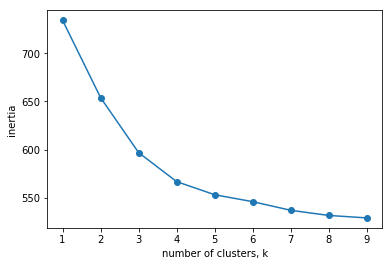

In [23]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [86]:
#run model with 4 clusters. Each time model is run labels change
normalizer = Normalizer()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(np_array)
labels = pipeline.predict(np_array) #might not need this
df_labels = pd.DataFrame({'Gen Unit': gen_array, 'labels': labels})

In [87]:
#find cluster centers
centroids = kmeans.cluster_centers_

In [88]:
kmeans.cluster_centers_.shape

(4, 8760)

In [89]:
x0 = centroids[0,:]
x1 = centroids[1,:]
x2 = centroids[2,:]
x3 = centroids[3,:]

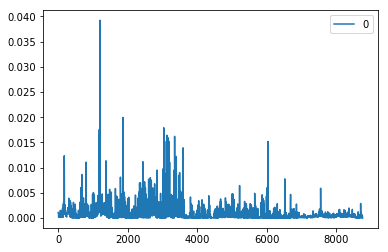

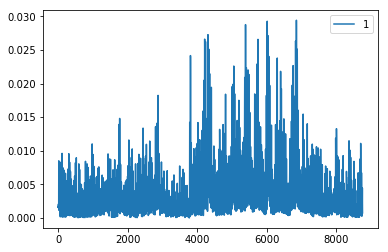

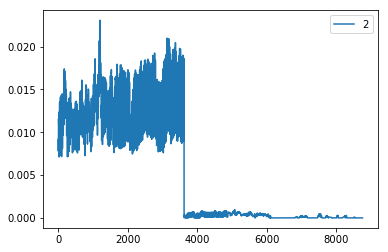

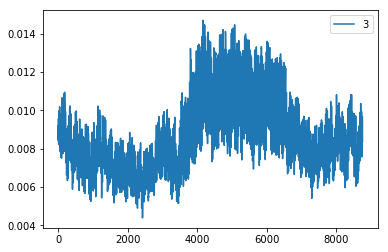

In [93]:
plt.plot(x0, label = '0')
plt.legend(loc='upper right')
plt.show()
plt.plot(x1, label = '1')
plt.legend(loc='upper right')
plt.show()
plt.plot(x2, label = '2')
plt.legend(loc='upper right')
plt.show()
plt.plot(x3, label = '3')
plt.legend(loc='upper right')
plt.show()

In [91]:
len(df_labels)

994

In [92]:
df_labels['labels'].value_counts().sort_index()

0    378
1    229
2    144
3    243
Name: labels, dtype: int64

In [78]:
df_labels.to_csv('kmean_labels.csv')